In [1]:
# Шаг 1: Проверка текущего интерпретатора
import sys
print(sys.executable)

C:\Program Files\Python310\python.exe


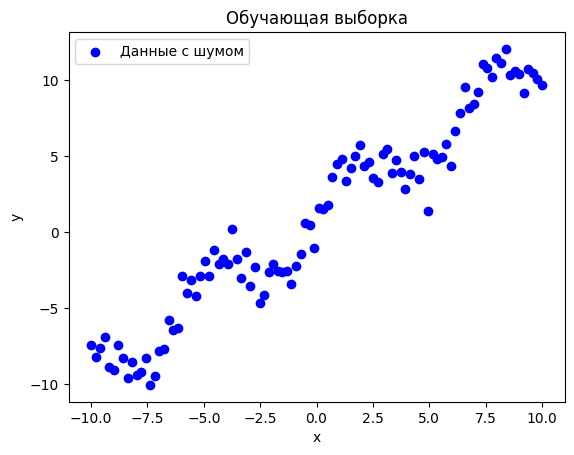

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры генерации данных
np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 100     # Количество точек
x = np.linspace(-10, 10, n_samples)  # Диапазон значений x
noise = np.random.normal(0, 1, n_samples)  # Шум с N(0, 1)

# Функция y(x)
theta1, theta2, theta3 = 1, 2, 1
y = theta1 * x + theta2 * np.sin(x) + theta3 + noise

# Визуализируем данные
plt.scatter(x, y, label="Данные с шумом", color="blue")
plt.title("Обучающая выборка")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

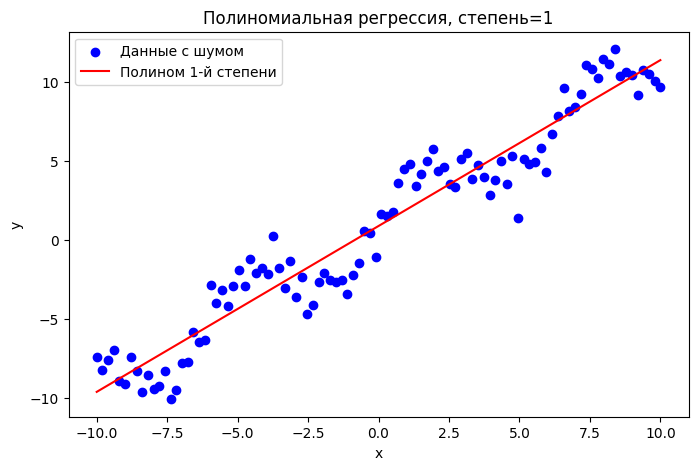

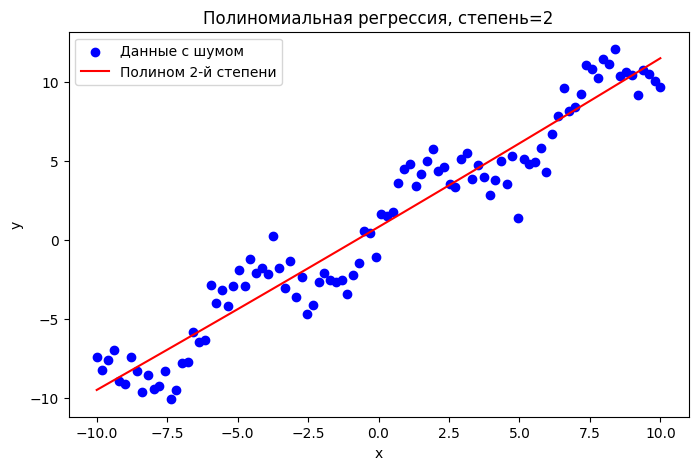

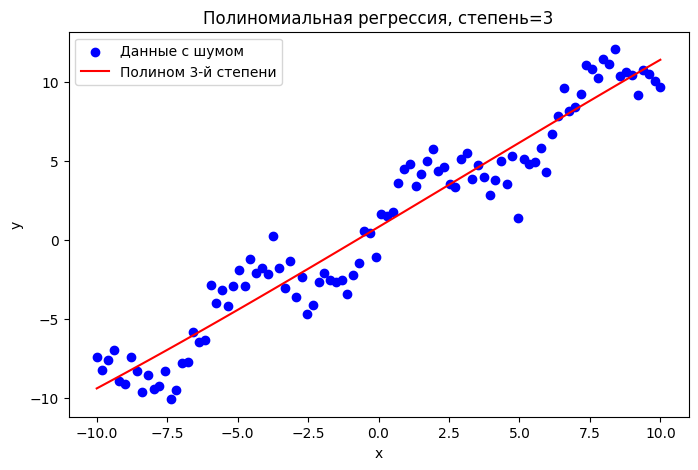

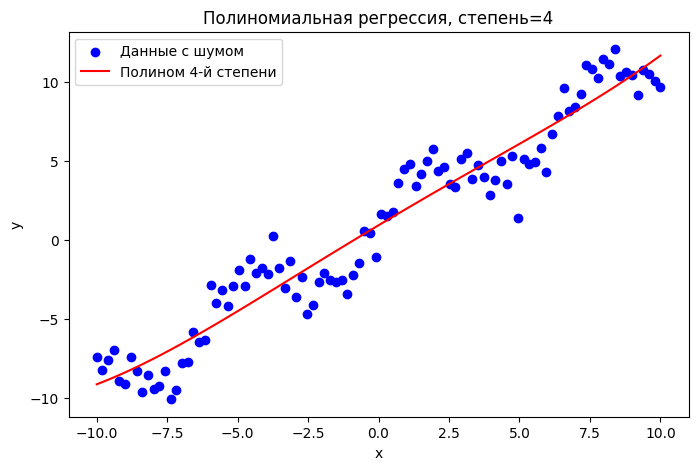

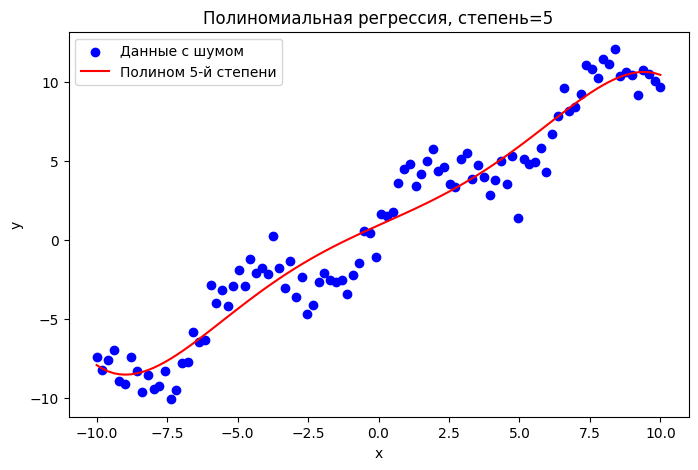

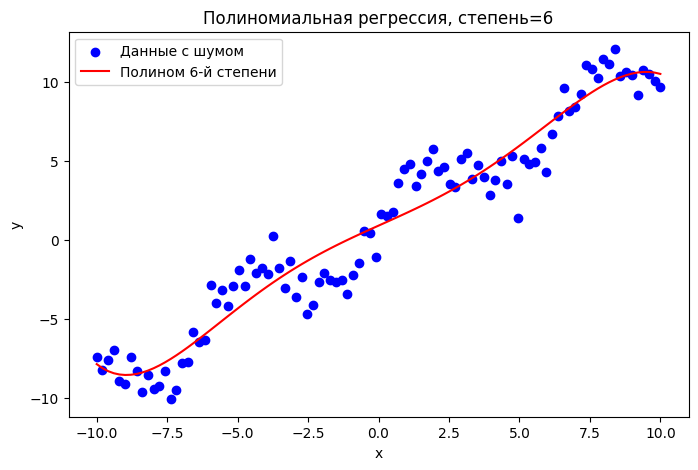

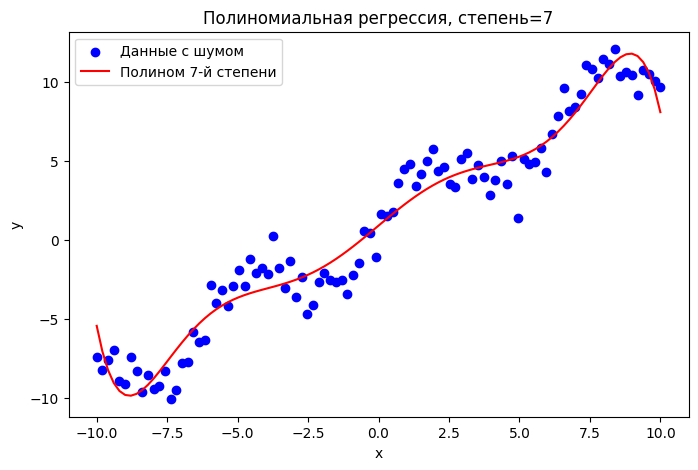

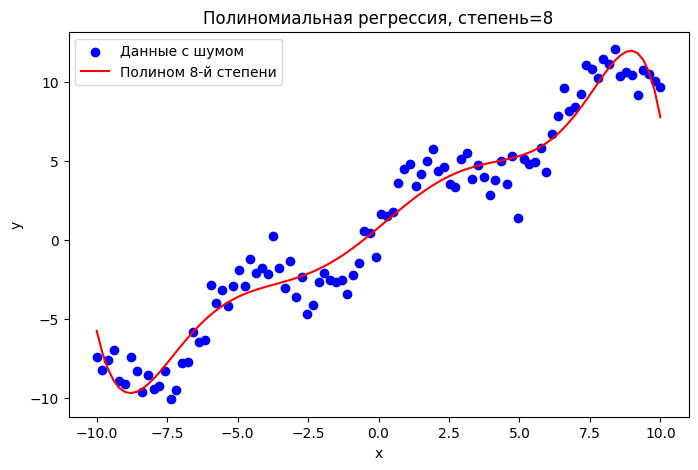

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект PolynomialFeatures для разных степеней полинома
degrees = np.arange(1, 9) # Проверяем полиномы от 1 до 6 степени
#degrees = np.arange(1, 15) # Проверяем полиномы от 1 до 14 степени

mse_values = []               # Список для хранения MSE для каждой степени

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Преобразуем x в полиномиальные признаки
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Предсказываем значения
    y_pred = model.predict(X_poly)
    
    # Вычисляем среднеквадратическую ошибку (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    
    # Визуализируем предсказания для текущей степени
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Данные с шумом", color="blue")
    plt.plot(x, y_pred, label=f"Полином {degree}-й степени", color="red")
    plt.title(f"Полиномиальная регрессия, степень={degree}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

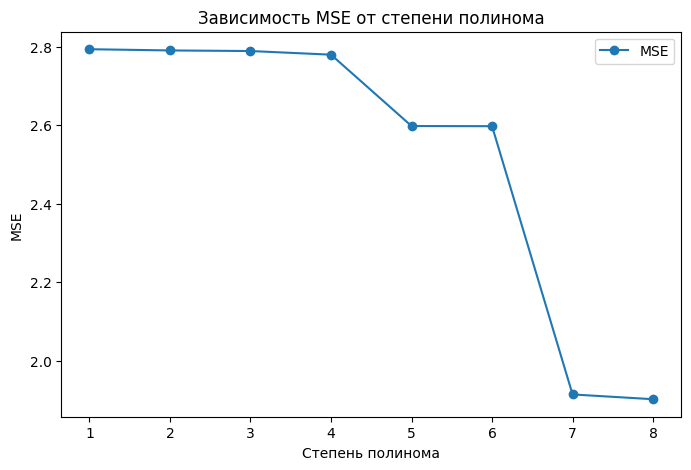

Оптимальная степень полинома: 8
MSE для оптимальной степени: 1.90


In [4]:
# Визуализируем зависимость MSE от степени полинома
plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_values, marker='o', label="MSE")
plt.title("Зависимость MSE от степени полинома")
plt.xlabel("Степень полинома")
plt.ylabel("MSE")
plt.xticks(degrees)
plt.legend()
plt.show()

# Находим оптимальную степень
optimal_degree = degrees[np.argmin(mse_values)]
optimal_mse = mse_values[np.argmin(mse_values)]

# Выводим результаты
print(f"Оптимальная степень полинома: {optimal_degree}")
print(f"MSE для оптимальной степени: {optimal_mse:.2f}")

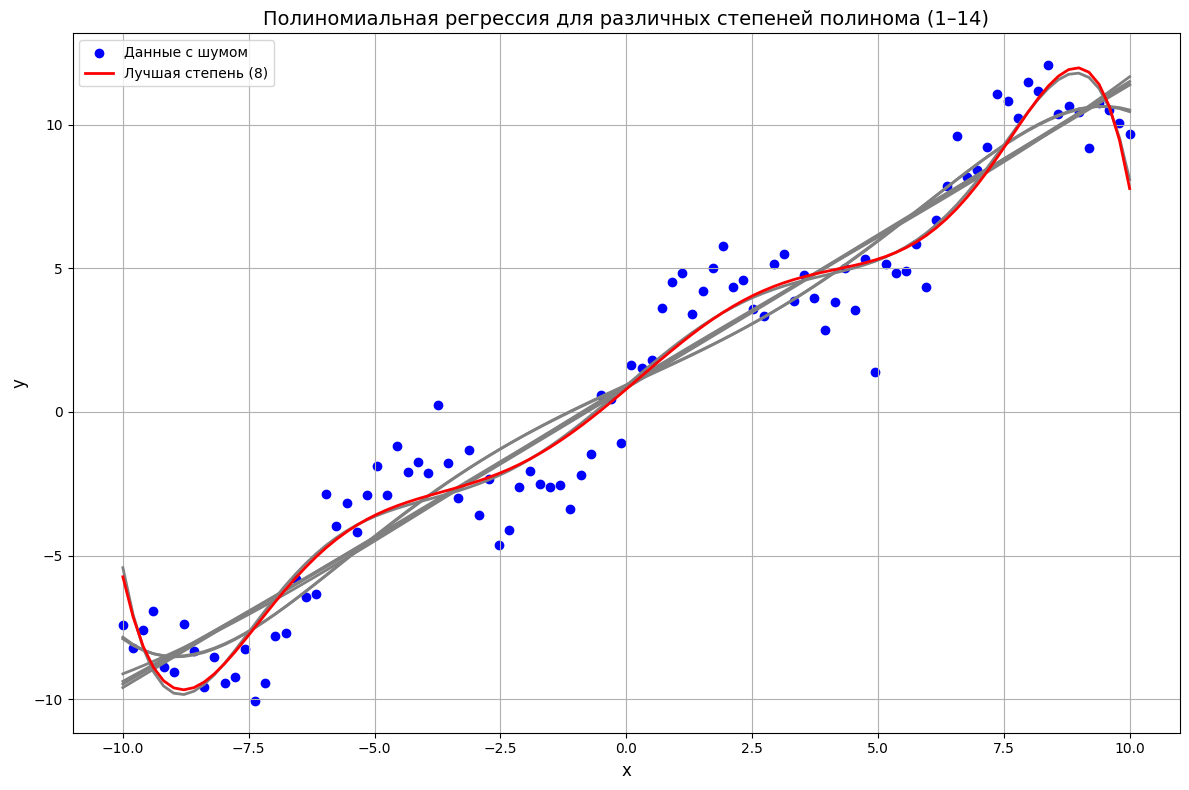

In [5]:
cmap = plt.colormaps['tab20']  # Цветовая карта для 14 степеней
# Визуализируем данные и предсказания для всех степеней на одном графике
plt.figure(figsize=(12, 8))
plt.scatter(x, y, label="Данные с шумом", color="blue")

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))  # Преобразуем x в полиномиальные признаки
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Предсказываем значения
    y_pred = model.predict(X_poly)
    
    # Определяем цвет линии
    if degree == optimal_degree:
        color = "red"  # Яркий цвет для оптимальной степени
        label = f"Лучшая степень ({degree})"
    else:
        color = "gray"  # Тусклый цвет для остальных степеней
        label = None  # Без подписи для остальных степеней
    
    # Строим график для текущей степени
    plt.plot(x, y_pred, label=label, color=color, linewidth=2)

# Настройка графика
plt.title("Полиномиальная регрессия для различных степеней полинома (1–14)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10)  # Легенда только для лучшей степени
plt.grid(True)
plt.tight_layout()
plt.show()

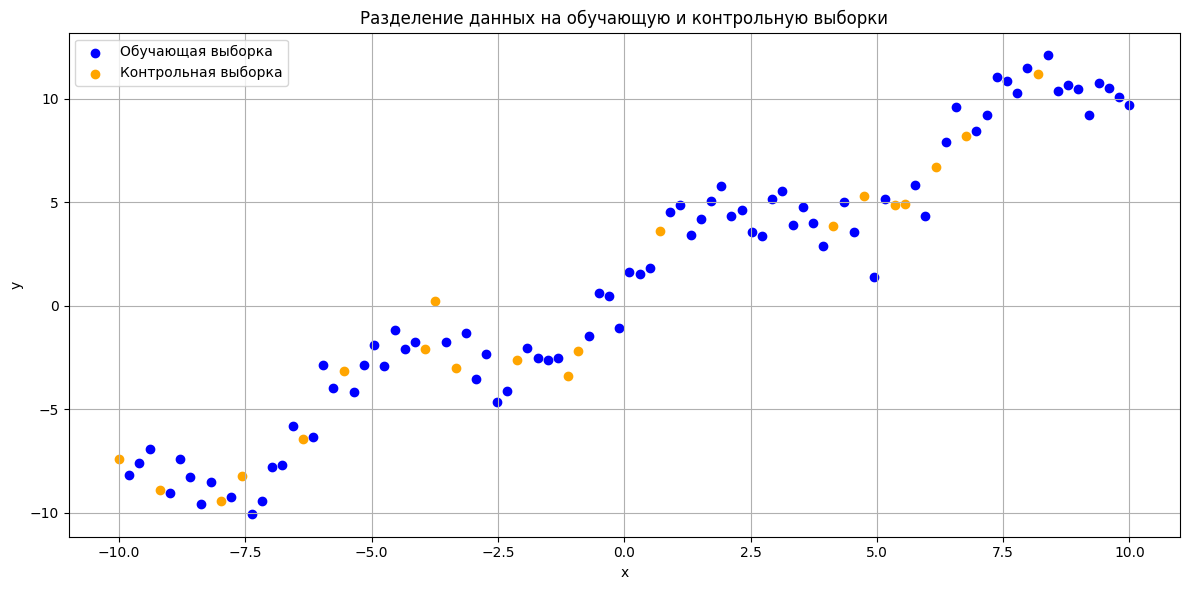

In [6]:
from sklearn.model_selection import train_test_split
# Разделяем данные на обучающую и контрольную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Визуализируем данные
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue")
plt.scatter(x_test, y_test, label="Контрольная выборка", color="orange")
plt.title("Разделение данных на обучающую и контрольную выборки")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Степень 8:
  Коэффициенты: [ 0.00000000e+00  1.53822164e+00 -2.75685650e-02 -5.20454933e-02
  1.10039730e-03  1.27764472e-03 -1.90163685e-05 -8.50582575e-06
  1.18688103e-07]
  Свободный член: 1.054808829907729

Степень 13:
  Коэффициенты: [ 0.00000000e+00  2.86052487e+00 -6.03716954e-03 -2.56031825e-01
  3.86974769e-05  9.21688749e-03 -3.45216187e-06 -1.04137130e-04
 -8.82050772e-08 -1.91495127e-07  4.36261086e-09  9.85105948e-09
 -3.15996908e-11 -4.37166565e-11]
  Свободный член: 0.9186243013626221

Степень 18:
  Коэффициенты: [ 0.00000000e+00  8.48199117e-10 -8.60047316e-10  5.68637083e-10
 -1.84335992e-08  1.38703738e-08 -2.91714776e-07  2.98105448e-07
 -2.78695173e-06  4.17857405e-06  5.31156437e-08 -1.87534546e-07
  2.06114530e-09  3.23691333e-09 -7.23911048e-11 -2.52458030e-11
  7.66756077e-13  7.46119846e-14 -2.74577094e-15]
  Свободный член: 1.245727852288364



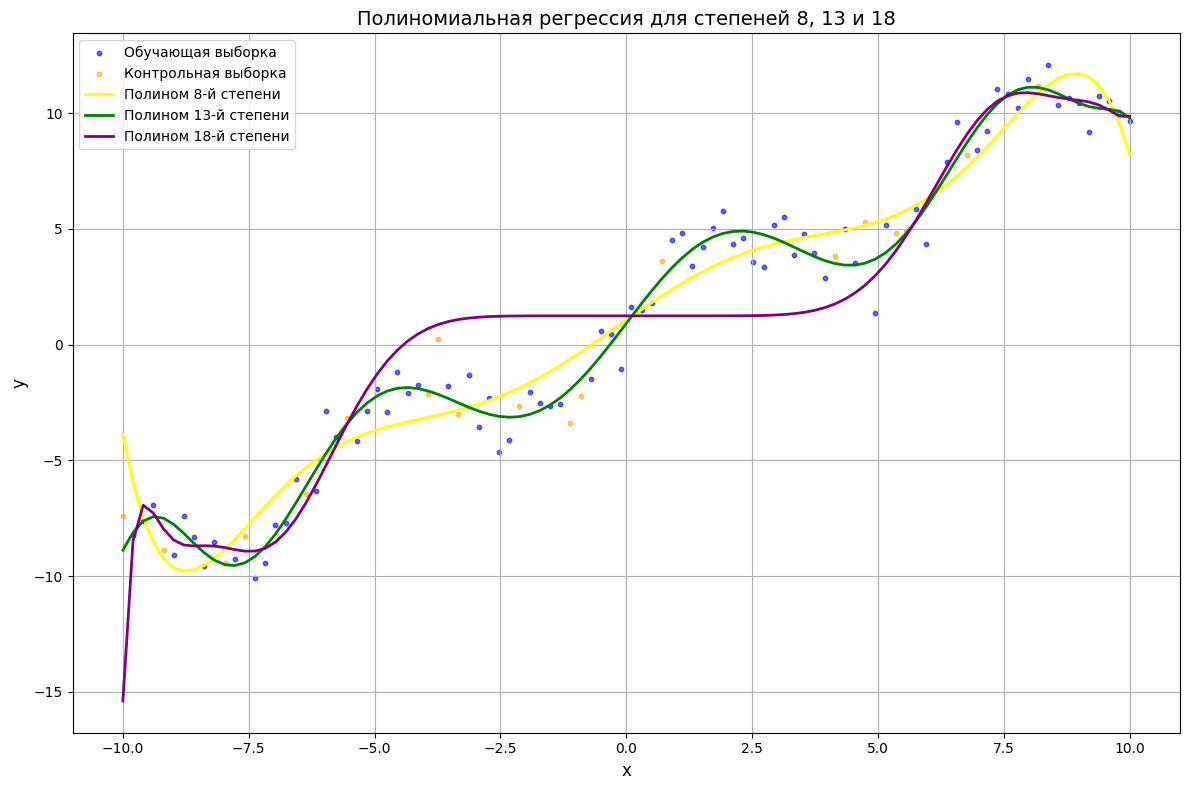

In [7]:
from sklearn.linear_model import LinearRegression

# Определяем степени полиномов
#degrees = [13, 18, 23]
degrees = [8, 13, 18]

# Словарь для хранения моделей и коэффициентов
models = {}

# Обучаем модели для каждой степени
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Сохраняем модель и коэффициенты
    models[degree] = {
        'model': model,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }
    
    # Выводим коэффициенты
    print(f"Степень {degree}:")
    print(f"  Коэффициенты: {model.coef_}")
    print(f"  Свободный член: {model.intercept_}\n")

# Визуализируем предсказания для всех степеней на одном графике
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue", alpha=0.6, s=10)
plt.scatter(x_test, y_test, label="Контрольная выборка", color="orange", alpha=0.6, s=10)

# Сортируем x для гладкого отображения линий
x_sorted = np.sort(x)
X_sorted_poly = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_sorted_poly[degree] = poly.fit_transform(x_sorted.reshape(-1, 1))
    y_pred_sorted = models[degree]['model'].predict(X_sorted_poly[degree])
    
    # Определяем цвет линии
    if degree == 8:
        color = "yellow"
        label = f"Полином 8-й степени"
    elif degree == 13:
        color = "green"
        label = f"Полином 13-й степени"
    elif degree == 18:
        color = "purple"
        label = f"Полином 18-й степени"
    else:
        color = "gray"
        label = None
    
    # Строим график для текущей степени
    plt.plot(x_sorted, y_pred_sorted, label=label, color=color, linewidth=2)

# Настройка графика
plt.title("Полиномиальная регрессия для степеней 8, 13 и 18", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

- Полином 13-й степени (красная линия): Хорошо аппроксимирует данные.
- Полином 18-й степени (зеленая линия): Начинает переобучаться, подстраиваясь под шум.
- Полином 23-й степени (фиолетовая линия): Сильно переобучается и плохо попадает под контрольную выборку.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Значения параметра lambda
lambda_values = np.arange(0.01, 10.1, 0.1)

# Словари для хранения моделей и коэффициентов
models = {}
ridge_models = {}
lasso_models = {}

# Словари для хранения MSE
mse_linear = {}
mse_ridge = {}
mse_lasso = {}

# Обучаем модели для каждой степени
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))
    
    # Обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Сохраняем модель и коэффициенты
    models[degree] = {
        'model': model,
        'coefficients': model.coef_,
        'intercept': model.intercept_
    }
    
    # MSE для полиномиальной регрессии
    y_train_pred = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_train_pred)
    y_test_pred = model.predict(X_test_poly)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mse_linear[degree] = {
        'train': mse_train,
        'test': mse_test
    }
    
    print(f"Полиномиальная регрессия, степень {degree}:")
    print(f"  MSE на обучающей выборке: {mse_train:.4f}")
    print(f"  MSE на контрольной выборке: {mse_test:.4f}\n")
    
    # Ridge регрессия с кросс-валидацией для выбора оптимального lambda
    ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
    param_grid = {'ridge__alpha': lambda_values}
    ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    ridge_grid.fit(X_train_poly, y_train)
    
    # Лучшее значение lambda и соответствующая модель
    best_ridge_alpha = ridge_grid.best_params_['ridge__alpha']
    best_ridge_model = ridge_grid.best_estimator_.named_steps['ridge']
    
    # Сохраняем лучшую модель Ridge
    ridge_models[degree] = {
        'best_alpha': best_ridge_alpha,
        'model': best_ridge_model,
        'coefficients': best_ridge_model.coef_,
        'intercept': best_ridge_model.intercept_
    }
    
    # MSE для Ridge регрессии
    y_train_pred_ridge = best_ridge_model.predict(X_train_poly)
    mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    y_test_pred_ridge = best_ridge_model.predict(X_test_poly)
    mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    
    mse_ridge[degree] = {
        'train': mse_train_ridge,
        'test': mse_test_ridge
    }
    
    print(f"Ridge регрессия, степень {degree}, lambda={best_ridge_alpha:.2f}:")
    print(f"  MSE на обучающей выборке: {mse_train_ridge:.4f}")
    print(f"  MSE на контрольной выборке: {mse_test_ridge:.4f}\n")
    
    # Lasso регрессия с кросс-валидацией для выбора оптимального lambda
    lasso_pipeline = make_pipeline(StandardScaler(), Lasso(max_iter=10000, tol=0.001))
    param_grid = {'lasso__alpha': lambda_values}
    lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    lasso_grid.fit(X_train_poly, y_train)
    
    # Лучшее значение lambda и соответствующая модель
    best_lasso_alpha = lasso_grid.best_params_['lasso__alpha']
    best_lasso_model = lasso_grid.best_estimator_.named_steps['lasso']
    
    # Сохраняем лучшую модель Lasso
    lasso_models[degree] = {
        'best_alpha': best_lasso_alpha,
        'model': best_lasso_model,
        'coefficients': best_lasso_model.coef_,
        'intercept': best_lasso_model.intercept_
    }
    
    # MSE для Lasso регрессии
    y_train_pred_lasso = best_lasso_model.predict(X_train_poly)
    mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    y_test_pred_lasso = best_lasso_model.predict(X_test_poly)
    mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    
    mse_lasso[degree] = {
        'train': mse_train_lasso,
        'test': mse_test_lasso
    }
    
    print(f"Lasso регрессия, степень {degree}, lambda={best_lasso_alpha:.2f}:")
    print(f"  MSE на обучающей выборке: {mse_train_lasso:.2f}")
    print(f"  MSE на контрольной выборке: {mse_test_lasso:.2f}\n")

Полиномиальная регрессия, степень 8:
  MSE на обучающей выборке: 1.9232
  MSE на контрольной выборке: 2.2000

Ridge регрессия, степень 8, lambda=0.71:
  MSE на обучающей выборке: 53931474456984.2109
  MSE на контрольной выборке: 19798395766016.6172

Lasso регрессия, степень 8, lambda=0.01:
  MSE на обучающей выборке: 73574715143289.23
  MSE на контрольной выборке: 126270205588145.33

Полиномиальная регрессия, степень 13:
  MSE на обучающей выборке: 0.7201
  MSE на контрольной выборке: 0.9429

Ridge регрессия, степень 13, lambda=0.01:
  MSE на обучающей выборке: 1344925537449261152113524736.0000
  MSE на контрольной выборке: 1703582221914159283345293312.0000

Lasso регрессия, степень 13, lambda=0.11:
  MSE на обучающей выборке: 309444437348298906402816.00
  MSE на контрольной выборке: 381884804832706768666624.00

Полиномиальная регрессия, степень 18:
  MSE на обучающей выборке: 5.0544
  MSE на контрольной выборке: 7.9014

Ridge регрессия, степень 18, lambda=0.01:
  MSE на обучающей выбо

| Степень | Модель                | Лямбда (lambda) | MSE (обучающая выборка)       | MSE (контрольная выборка)       |
|---------|-----------------------|-----------------|-------------------------------|---------------------------------|
| 8       | Полиномиальная        | -               | 1.9232                        | 2.2000                         |
| 8       | Ridge                 | 0.71            | 53931474456984.2109           | 19798395766016.6172            |
| 8       | Lasso                 | 0.01            | 73574715143289.2344           | 126270205588145.3281           |
| 13      | Полиномиальная        | -               | 0.7201                        | 0.9429                         |
| 13      | Ridge                 | 0.01            | 1344925537449261152113524736.0000 | 1703582221914159283345293312.0000 |
| 13      | Lasso                 | 0.11            | 309444437348298906402816.0000 | 381884804832706768666624.0000  |
| 18      | Полиномиальная        | -               | 5.0544                        | 7.9014                         |
| 18      | Ridge                 | 0.01            | 304622956879270265596417924470407168.0000 | 956960041262530708893549744837623808.0000 |
| 18      | Lasso                 | 0.11            | 40198655467969075930425802620928.0000 | 59030757571674442069493512404992.0000 |

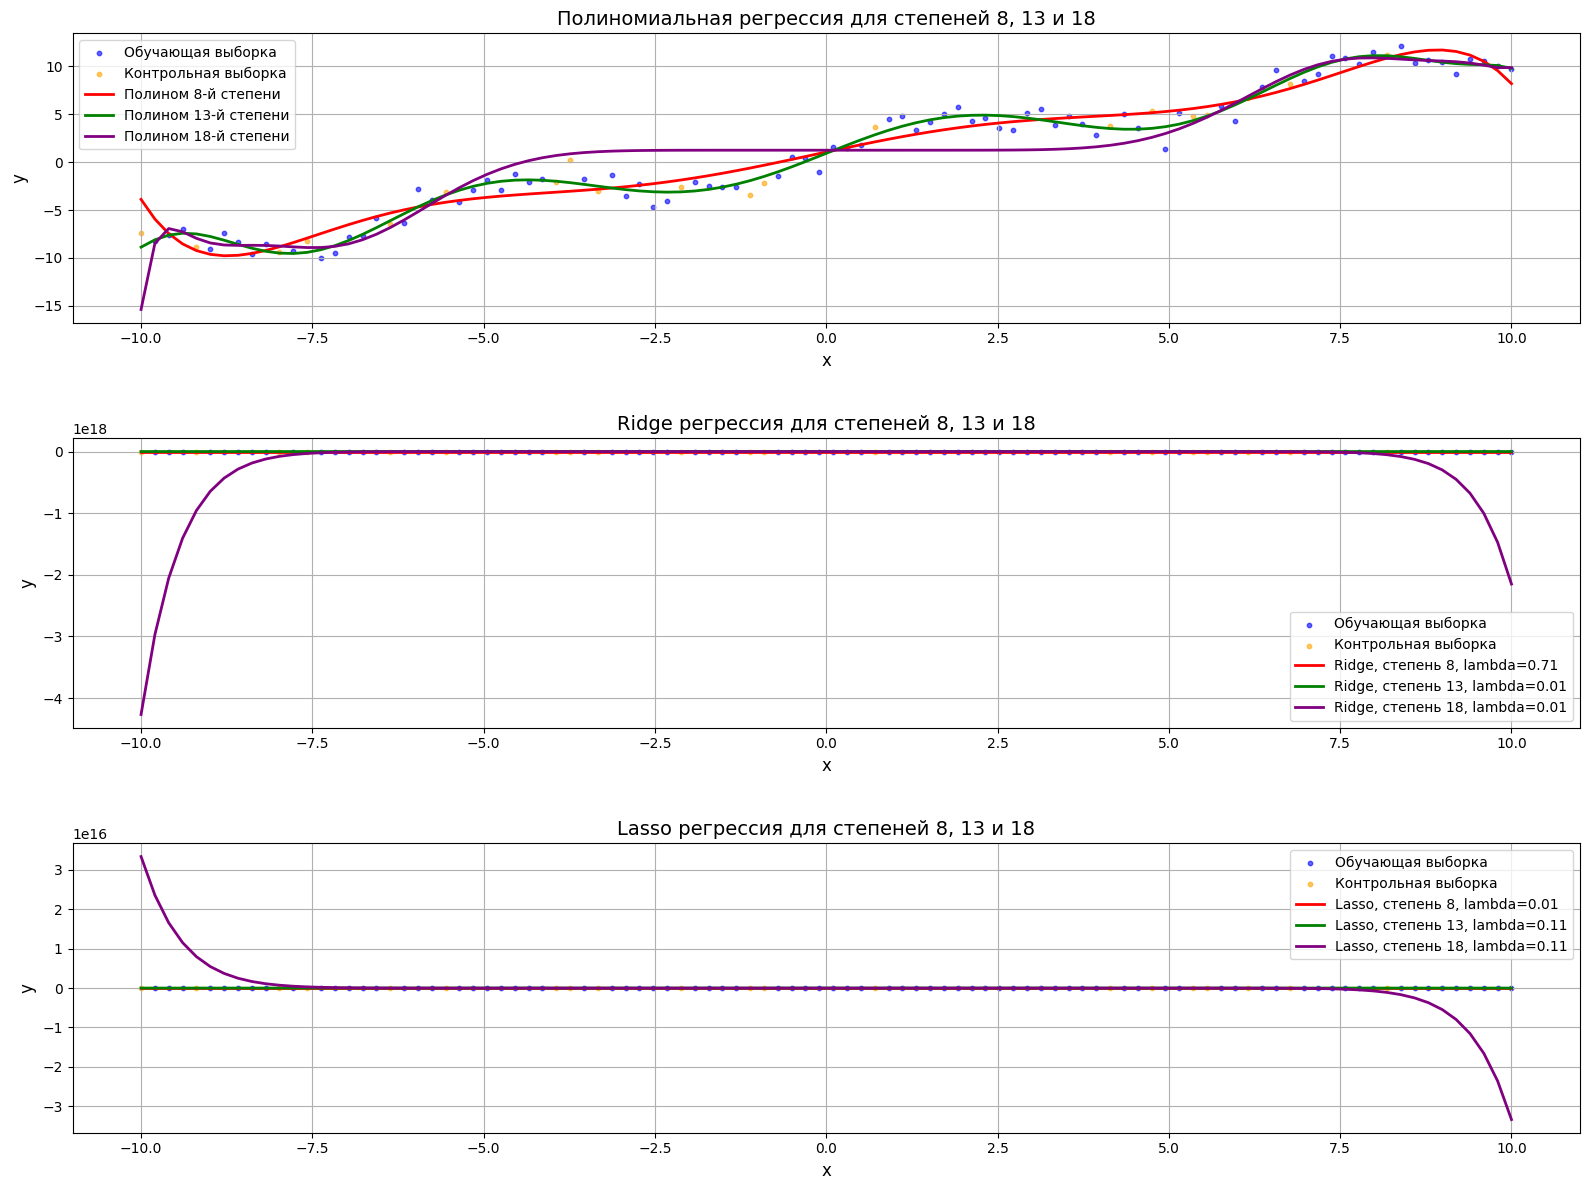

In [9]:
# Сортируем x для гладкого отображения линий
x_sorted = np.sort(x)
X_sorted_poly = {}

# Визуализируем предсказания для полиномиальной регрессии
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue", alpha=0.6, s=10)
plt.scatter(x_test, y_test, label="Контрольная выборка", color="orange", alpha=0.6, s=10)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_sorted_poly[degree] = poly.fit_transform(x_sorted.reshape(-1, 1))
    y_pred_sorted = models[degree]['model'].predict(X_sorted_poly[degree])
    
    # Определяем цвет линии
    if degree == 8:
        color = "red"
        label = f"Полином 8-й степени"
    elif degree == 13:
        color = "green"
        label = f"Полином 13-й степени"
    elif degree == 18:
        color = "purple"
        label = f"Полином 18-й степени"
    else:
        color = "gray"
        label = None
    
    # Строим график для текущей степени
    plt.plot(x_sorted, y_pred_sorted, label=label, color=color, linewidth=2)

# Настройка графика
plt.title("Полиномиальная регрессия для степеней 8, 13 и 18", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Визуализируем предсказания для Ridge регрессии
plt.subplot(3, 1, 2)
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue", alpha=0.6, s=10)
plt.scatter(x_test, y_test, label="Контрольная выборка", color="orange", alpha=0.6, s=10)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_sorted_poly[degree] = poly.fit_transform(x_sorted.reshape(-1, 1))
    lambd = ridge_models[degree]['best_alpha']
    ridge = ridge_models[degree]['model']
    y_pred_sorted = ridge.predict(X_sorted_poly[degree])
    
    # Определяем цвет линии
    if degree == 8:
        color = "red"
        label = f"Ridge, степень 8, lambda={lambd:.2f}"
    elif degree == 13:
        color = "green"
        label = f"Ridge, степень 13, lambda={lambd:.2f}"
    elif degree == 18:
        color = "purple"
        label = f"Ridge, степень 18, lambda={lambd:.2f}"
    else:
        color = "gray"
        label = None
    
    # Строим график для текущей степени
    plt.plot(x_sorted, y_pred_sorted, label=label, color=color, linewidth=2)

# Настройка графика
plt.title("Ridge регрессия для степеней 8, 13 и 18", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# Визуализируем предсказания для Lasso регрессии
plt.subplot(3, 1, 3)
plt.scatter(x_train, y_train, label="Обучающая выборка", color="blue", alpha=0.6, s=10)
plt.scatter(x_test, y_test, label="Контрольная выборка", color="orange", alpha=0.6, s=10)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_sorted_poly[degree] = poly.fit_transform(x_sorted.reshape(-1, 1))
    lambd = lasso_models[degree]['best_alpha']
    lasso = lasso_models[degree]['model']
    y_pred_sorted = lasso.predict(X_sorted_poly[degree])
    
    # Определяем цвет линии
    if degree == 8:
        color = "red"
        label = f"Lasso, степень 8, lambda={lambd:.2f}"
    elif degree == 13:
        color = "green"
        label = f"Lasso, степень 13, lambda={lambd:.2f}"
    elif degree == 18:
        color = "purple"
        label = f"Lasso, степень 18, lambda={lambd:.2f}"
    else:
        color = "gray"
        label = None
    
    # Строим график для текущей степени
    plt.plot(x_sorted, y_pred_sorted, label=label, color=color, linewidth=2)

# Настройка графика
plt.title("Lasso регрессия для степеней 8, 13 и 18", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.subplots_adjust(hspace=0.4)  # Добавляем отступ между графиками
plt.show()

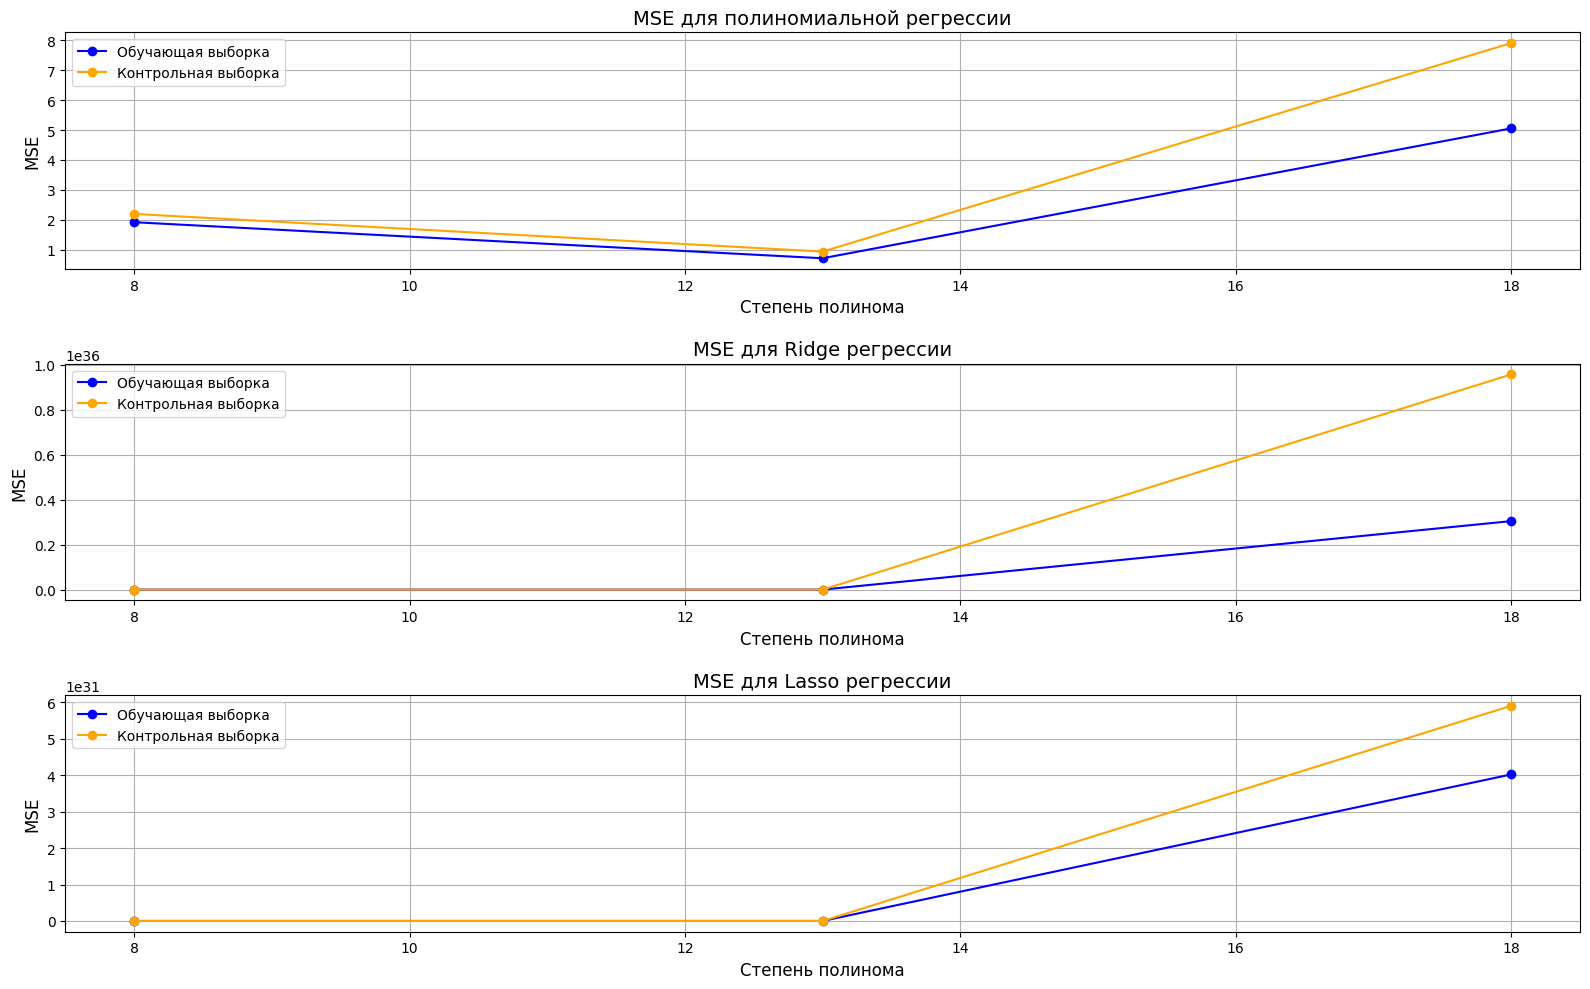

In [11]:
# Извлечение данных MSE для построения графиков
degrees = [8, 13, 18]  # Указываем степени полиномов, которые мы анализируем

mse_linear_train = [mse_linear[deg]['train'] for deg in degrees]
mse_linear_test = [mse_linear[deg]['test'] for deg in degrees]

mse_ridge_train = [mse_ridge[deg]['train'] for deg in degrees]
mse_ridge_test = [mse_ridge[deg]['test'] for deg in degrees]

mse_lasso_train = [mse_lasso[deg]['train'] for deg in degrees]
mse_lasso_test = [mse_lasso[deg]['test'] for deg in degrees]

# Построение графиков MSE
plt.figure(figsize=(16, 10))

# Полиномиальная регрессия
plt.subplot(3, 1, 1)
plt.plot(degrees, mse_linear_train, label="Обучающая выборка", marker='o', color='blue')
plt.plot(degrees, mse_linear_test, label="Контрольная выборка", marker='o', color='orange')
plt.title("MSE для полиномиальной регрессии", fontsize=14)
plt.xlabel("Степень полинома", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Ridge регрессия
plt.subplot(3, 1, 2)
plt.plot(degrees, mse_ridge_train, label="Обучающая выборка", marker='o', color='blue')
plt.plot(degrees, mse_ridge_test, label="Контрольная выборка", marker='o', color='orange')
plt.title("MSE для Ridge регрессии", fontsize=14)
plt.xlabel("Степень полинома", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Lasso регрессия
plt.subplot(3, 1, 3)
plt.plot(degrees, mse_lasso_train, label="Обучающая выборка", marker='o', color='blue')
plt.plot(degrees, mse_lasso_test, label="Контрольная выборка", marker='o', color='orange')
plt.title("MSE для Lasso регрессии", fontsize=14)
plt.xlabel("Степень полинома", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Настройка отступов между графиками
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Отображение графиков
plt.show()